# MNIST数据集使用LeNet进行图像分类
本示例教程演示如何在MNIST数据集上用LeNet进行图像分类。
手写数字的MNIST数据集，包含60,000个用于训练的示例和10,000个用于测试的示例。这些数字已经过尺寸标准化并位于图像中心，图像是固定大小(28x28像素)，其值为0到1。该数据集的官方地址为：http://yann.lecun.com/exdb/mnist/

# 环境
本教程基于paddle2.0-alpha编写，如果您的环境不是本版本，请先安装paddle2.0-alpha。

In [16]:
import paddle
print(paddle.__version__)
paddle.enable_imperative()

2.0.0-alpha0


# 加载数据集
我们使用飞桨自带的paddle.dataset完成mnist数据集的加载。

In [17]:
print('download training data and load training data')
train_dataset = paddle.incubate.hapi.datasets.MNIST(mode='train')
test_dataset = paddle.incubate.hapi.datasets.MNIST(mode='test')
print('load finished')
print(type(train_dataset[0][0]))

download training data and load training data
load finished
<class 'numpy.ndarray'>


取训练集中的一条数据看一下。

train_data0 label is: [5]


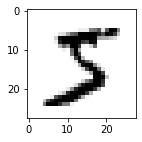

In [18]:
import numpy as np
import matplotlib.pyplot as plt
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.transpose(1,2,0)
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
print('train_data0 label is: ' + str(train_label_0))

# 2.组网&训练方案1
paddle支持用model类，直接完成模型的训练，具体如下。

### 首先需要继承Model来自定义LeNet网络。

In [19]:
import paddle
class LeNet(paddle.incubate.hapi.model.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = paddle.nn.Conv2D(num_channels=1, num_filters=6, filter_size=5, stride=1, padding=2, act='relu')
        self.max_pool1 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.conv2 = paddle.nn.Conv2D(num_channels=6, num_filters=16, filter_size=5, stride=1, act='relu')
        self.max_pool2 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.linear1 = paddle.nn.Linear(input_dim=16*5*5, output_dim=120, act='relu')
        self.linear2 = paddle.nn.Linear(input_dim=120, output_dim=84, act='relu')
        self.linear3 = paddle.nn.Linear(input_dim=84, output_dim=10, act='softmax')

    def forward(self, x):
        x = self.conv1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x, shape=[-1, 16*5*5])
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

### 初始化Model，并定义相关的参数。

In [20]:
from paddle.incubate.hapi.model import Input
from paddle.incubate.hapi.loss import CrossEntropy
from paddle.incubate.hapi.metrics import Accuracy

inputs = [Input([None, 1, 28, 28], 'float32', name='image')]
labels = [Input([None, 1], 'int64', name='label')]
model = LeNet()
optim = paddle.optimizer.Adam(learning_rate=0.001, parameter_list=model.parameters())

model.prepare(
    optim,
    CrossEntropy(),
    Accuracy(topk=(1, 2)),
    inputs=inputs,
    labels=labels)

### 使用fit来训练模型

In [21]:
model.fit(train_dataset,
        test_dataset,
        epochs=2,
        batch_size=64,
        save_dir='mnist_checkpoint')

Epoch 1/2
step  10/938 - loss: 2.1912 - acc_top1: 0.2719 - acc_top2: 0.4109 - 16ms/step
step  20/938 - loss: 1.6389 - acc_top1: 0.4109 - acc_top2: 0.5367 - 15ms/step
step  30/938 - loss: 1.1486 - acc_top1: 0.4797 - acc_top2: 0.6135 - 15ms/step
step  40/938 - loss: 0.7755 - acc_top1: 0.5484 - acc_top2: 0.6770 - 15ms/step
step  50/938 - loss: 0.7651 - acc_top1: 0.5975 - acc_top2: 0.7266 - 15ms/step
step  60/938 - loss: 0.3837 - acc_top1: 0.6393 - acc_top2: 0.7617 - 15ms/step
step  70/938 - loss: 0.6532 - acc_top1: 0.6712 - acc_top2: 0.7888 - 15ms/step
step  80/938 - loss: 0.3394 - acc_top1: 0.6969 - acc_top2: 0.8107 - 15ms/step
step  90/938 - loss: 0.2527 - acc_top1: 0.7189 - acc_top2: 0.8283 - 15ms/step
step 100/938 - loss: 0.2055 - acc_top1: 0.7389 - acc_top2: 0.8427 - 14ms/step
step 110/938 - loss: 0.3987 - acc_top1: 0.7531 - acc_top2: 0.8536 - 14ms/step
step 120/938 - loss: 0.2372 - acc_top1: 0.7660 - acc_top2: 0.8622 - 14ms/step
step 130/938 - loss: 0.4071 - acc_top1: 0.7780 - acc_t

step 120/157 - loss: 0.0093 - acc_top1: 0.9768 - acc_top2: 0.9931 - 5ms/step
step 130/157 - loss: 0.1247 - acc_top1: 0.9774 - acc_top2: 0.9935 - 5ms/step
step 140/157 - loss: 0.0031 - acc_top1: 0.9785 - acc_top2: 0.9940 - 5ms/step
step 150/157 - loss: 0.0495 - acc_top1: 0.9794 - acc_top2: 0.9944 - 5ms/step
step 157/157 - loss: 0.0020 - acc_top1: 0.9790 - acc_top2: 0.9944 - 5ms/step
Eval samples: 10000
Epoch 2/2
step  10/938 - loss: 0.1735 - acc_top1: 0.9766 - acc_top2: 0.9938 - 16ms/step
step  20/938 - loss: 0.0723 - acc_top1: 0.9750 - acc_top2: 0.9922 - 15ms/step
step  30/938 - loss: 0.0593 - acc_top1: 0.9781 - acc_top2: 0.9927 - 15ms/step
step  40/938 - loss: 0.1243 - acc_top1: 0.9793 - acc_top2: 0.9938 - 15ms/step
step  50/938 - loss: 0.0127 - acc_top1: 0.9797 - acc_top2: 0.9944 - 15ms/step
step  60/938 - loss: 0.0319 - acc_top1: 0.9779 - acc_top2: 0.9938 - 15ms/step
step  70/938 - loss: 0.0404 - acc_top1: 0.9783 - acc_top2: 0.9946 - 15ms/step
step  80/938 - loss: 0.1120 - acc_top1:

step  70/157 - loss: 0.0299 - acc_top1: 0.9768 - acc_top2: 0.9953 - 5ms/step
step  80/157 - loss: 0.0108 - acc_top1: 0.9771 - acc_top2: 0.9955 - 5ms/step
step  90/157 - loss: 0.0209 - acc_top1: 0.9793 - acc_top2: 0.9958 - 5ms/step
step 100/157 - loss: 0.0031 - acc_top1: 0.9806 - acc_top2: 0.9962 - 5ms/step
step 110/157 - loss: 4.0509e-04 - acc_top1: 0.9808 - acc_top2: 0.9962 - 5ms/step
step 120/157 - loss: 8.9143e-04 - acc_top1: 0.9820 - acc_top2: 0.9965 - 5ms/step
step 130/157 - loss: 0.0119 - acc_top1: 0.9833 - acc_top2: 0.9968 - 5ms/step
step 140/157 - loss: 6.7999e-04 - acc_top1: 0.9844 - acc_top2: 0.9970 - 5ms/step
step 150/157 - loss: 0.0047 - acc_top1: 0.9853 - acc_top2: 0.9972 - 5ms/step
step 157/157 - loss: 1.6522e-04 - acc_top1: 0.9847 - acc_top2: 0.9973 - 5ms/step
Eval samples: 10000
save checkpoint at mnist_checkpoint/final


### 组网&训练方式1结束
以上就是组网&训练方式1，可以非常快速的完成网络模型的构建与训练。此外，paddle还可以用下面的方式来完成模型的训练。

# 3.组网&训练方式2
方式1可以快速便捷的完成组网&训练，将细节都隐藏了起来。而方式2则可以用最基本的方式，完成模型的组网与训练。具体如下。

### 通过继承Layer的方式来构建模型

In [22]:
import paddle
class LeNet(paddle.nn.Layer):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = paddle.nn.Conv2D(num_channels=1, num_filters=6, filter_size=5, stride=1, padding=2, act='relu')
        self.max_pool1 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.conv2 = paddle.nn.Conv2D(num_channels=6, num_filters=16, filter_size=5, stride=1, act='relu')
        self.max_pool2 = paddle.nn.Pool2D(pool_size=2, pool_type='max', pool_stride=2)
        self.linear1 = paddle.nn.Linear(input_dim=16*5*5, output_dim=120, act='relu')
        self.linear2 = paddle.nn.Linear(input_dim=120, output_dim=84, act='relu')
        self.linear3 = paddle.nn.Linear(input_dim=84, output_dim=10,act='softmax')

    def forward(self, x):
        x = self.conv1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x, shape=[-1, 16*5*5])
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

### 训练模型

In [23]:
import paddle
train_loader = paddle.io.DataLoader(train_dataset, places=paddle.CPUPlace(), batch_size=64)
def train(model):
    model.train()
    epochs = 2
    batch_size = 64
    optim = paddle.optimizer.Adam(learning_rate=0.001, parameter_list=model.parameters())
    for epoch in range(epochs):
        for batch_id, data in enumerate(train_loader()):
            x_data = data[0]
            y_data = data[1]
            predicts = model(x_data)
            loss = paddle.nn.functional.cross_entropy(predicts, y_data)
            acc = paddle.metric.accuracy(predicts, y_data, k=2)
            avg_loss = paddle.mean(loss)
            avg_acc = paddle.mean(acc)
            avg_loss.backward()
            if batch_id % 100 == 0:
                print("epoch: {}, batch_id: {}, loss is: {}, acc is: {}".format(epoch, batch_id, avg_loss.numpy(), avg_acc.numpy()))
            optim.minimize(avg_loss)
            model.clear_gradients()
model = LeNet()
train(model)

epoch: 0, batch_id: 0, loss is: [2.2982373], acc is: [0.15625]
epoch: 0, batch_id: 100, loss is: [0.25794172], acc is: [0.96875]
epoch: 0, batch_id: 200, loss is: [0.25025752], acc is: [0.984375]
epoch: 0, batch_id: 300, loss is: [0.17673397], acc is: [0.984375]
epoch: 0, batch_id: 400, loss is: [0.09535598], acc is: [1.]
epoch: 0, batch_id: 500, loss is: [0.08496016], acc is: [1.]
epoch: 0, batch_id: 600, loss is: [0.14111154], acc is: [0.984375]
epoch: 0, batch_id: 700, loss is: [0.07322718], acc is: [0.984375]
epoch: 0, batch_id: 800, loss is: [0.2417614], acc is: [0.984375]
epoch: 0, batch_id: 900, loss is: [0.10721541], acc is: [1.]
epoch: 1, batch_id: 0, loss is: [0.02449418], acc is: [1.]
epoch: 1, batch_id: 100, loss is: [0.151768], acc is: [0.984375]
epoch: 1, batch_id: 200, loss is: [0.06956144], acc is: [0.984375]
epoch: 1, batch_id: 300, loss is: [0.2008793], acc is: [1.]
epoch: 1, batch_id: 400, loss is: [0.03839134], acc is: [1.]
epoch: 1, batch_id: 500, loss is: [0.02175

### 对模型进行验证

In [25]:
import paddle
test_loader = paddle.io.DataLoader(test_dataset, places=paddle.CPUPlace(), batch_size=64)
def test(model):
    model.eval()
    batch_size = 64
    for batch_id, data in enumerate(train_loader()):
        x_data = data[0]
        y_data = data[1]
        predicts = model(x_data)
        loss = paddle.nn.functional.cross_entropy(predicts, y_data)
        acc = paddle.metric.accuracy(predicts, y_data, k=2)
        avg_loss = paddle.mean(loss)
        avg_acc = paddle.mean(acc)
        avg_loss.backward()
        if batch_id % 100 == 0:
            print("batch_id: {}, loss is: {}, acc is: {}".format(batch_id, avg_loss.numpy(), avg_acc.numpy()))
test(model)

batch_id: 0, loss is: [0.0054796], acc is: [1.]
batch_id: 100, loss is: [0.12248081], acc is: [0.984375]
batch_id: 200, loss is: [0.06583288], acc is: [1.]
batch_id: 300, loss is: [0.07927508], acc is: [1.]
batch_id: 400, loss is: [0.02623187], acc is: [1.]
batch_id: 500, loss is: [0.02039231], acc is: [1.]
batch_id: 600, loss is: [0.03374948], acc is: [1.]
batch_id: 700, loss is: [0.05141395], acc is: [1.]
batch_id: 800, loss is: [0.1005884], acc is: [1.]
batch_id: 900, loss is: [0.03581202], acc is: [1.]


### 组网&训练方式2结束
以上就是组网&训练方式2，通过这种方式，可以清楚的看到训练和测试中的每一步过程。

## 总结


以上就是用LeNet对手写数字数据及MNIST进行分类。本示例提供了两种训练模型的方式，一种可以快速完成模型的组建与预测，非常适合新手用户上手。另一种则需要多个步骤来完成模型的训练，适合进阶用户使用。